In [42]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
from sklearn.cluster import KMeans
import os
import imageio

%matplotlib inline


In [60]:
#Clothing part
foldername = "./fashion";
topcolors = 3 #the number of top colors we want to compare

#iterate through folder and find kmeans data

num_points = len(os.listdir(foldername))

centerPoints = np.zeros((num_points,topcolors,3))
weights = np.ones((topcolors,1))
count =0

for item in os.listdir(foldername):
 
    image = Image.open(foldername+'/'+item)
    
    x = 64
    y = 64
    z = 3
    
    resized_image = image.resize((x,y))

    
    newim = np.reshape(resized_image,(x*y,z))

    
    kmeans = KMeans(n_clusters=topcolors, random_state=0).fit(newim)
    centers = kmeans.cluster_centers_  #cluster centers
    cluster_ids = kmeans.labels_
    for i in range(0,topcolors):
        vec = (cluster_ids == i)
        num = np.sum(vec)
        weights[i] = num/(x*y)
        
    order = np.argsort(weights,axis = None)
        
    centerPoints[count,:,:]=centers[order] #the top colors in the picture
    
    
    
    
    
    
    count = count +1;
    



In [61]:
def Euclid_dist(x, y):

    ndim = x.shape[0];

    dist= np.sqrt(np.sum(np.square(x-y)))

        
    return dist
    raise NotImplementedError
    



def distanceCalc(centerPoints):
    #centePoints is num*col*3
    num = centerPoints.shape[0]
    col = centerPoints.shape[1]
    FirstIm = np.zeros((3,1));
    SecondIm = np.zeros((3,1));
    distvec = np.zeros((num,num))
    dist = 0
    
    for i in range(0,num):
        for j in range(0,num):
            for k in range(0,col):
                FirstIm[0] = centerPoints[i,k,0];
                FirstIm[1] = centerPoints[i,k,1];
                FirstIm[2] = centerPoints[i,k,2];
                
                SecondIm[0] = centerPoints[j,k,0]
                SecondIm[1] = centerPoints[j,k,1]
                SecondIm[2] = centerPoints[j,k,2]
                
                dist = dist + Euclid_dist(FirstIm,SecondIm)
                
                
            distvec[i,j] = dist
            distvec[j,i] = dist
            dist = 0
            
            
            
    return distvec




def findGroup(WantedDist,distances):
    indices = np.argwhere(distances <= WantedDist)
    num = indices.shape[0]
    count = 0;
    
    
    for i in range(0,num):
       
        for j in range(0,num):
            if (indices[j,0] == i):
                if (count == 0):
                    newvec = indices[j,1]
                else:
                    newvec = np.append(newvec,indices[j,1])
                count = count+1
        count = 0;
        
        if(i == 0):
            store = newvec
        else:
            store = np.append(store,newvec)
            
        store = np.append(store,-1)
        
        
    return store
        
      
    
    
                
                
                
                

In [62]:
def plot_images(img_list, title_list, figsize=(11, 6)):
    assert len(img_list) == len(title_list)
    fig, axes = plt.subplots(1, len(title_list), figsize=figsize)
    for i, ax in enumerate(axes):
        ax.imshow(img_list[i] / 255.0)
        ax.set_title(title_list[i])
        ax.axis('off')

Level:0
[ 0 -1  1 -1  2 -1  3 -1  4 -1  5 -1  6 -1  7 -1  8 -1  9 -1 10 -1 11 -1
 12 -1 13 -1 14 -1 15 -1 16 -1 17 -1 18 -1 19 -1 20 -1 21 -1 22 -1 23 -1
 24 -1 25 -1 26 -1 27 -1 28 -1]
(array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57]),)
1
3
end
3
3
5
end
3
5
7
end
3
7
9
end
3
9
11
end
3
11
13
end
3
13
15
end
3
15
17
end
3
17
19
end
3
19
21
end
3
21
23
end
3
23
25
end
3
25
27
end
3
27
29
end


IndexError: list index out of range

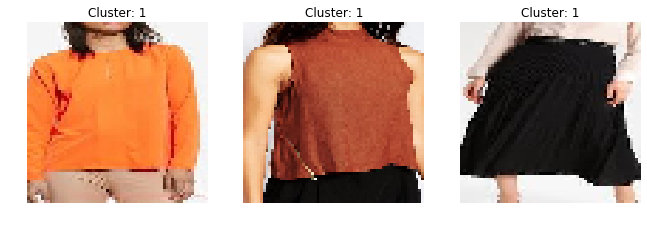

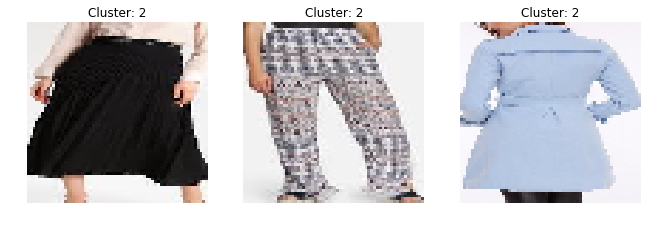

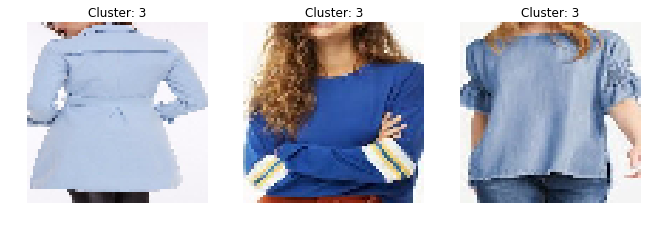

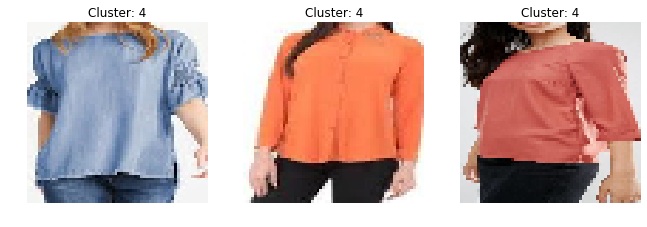

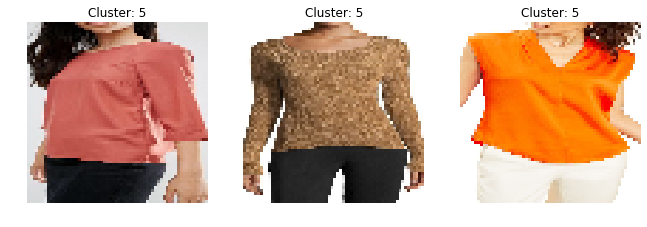

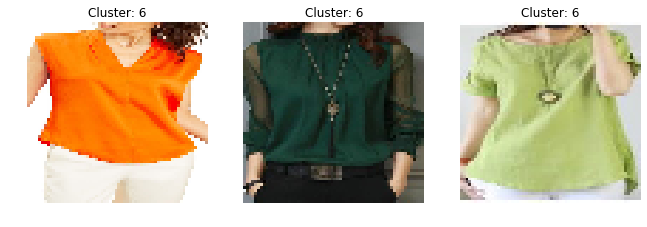

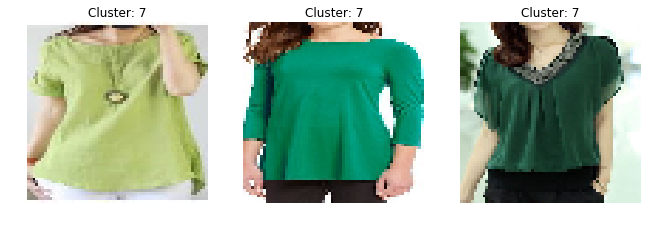

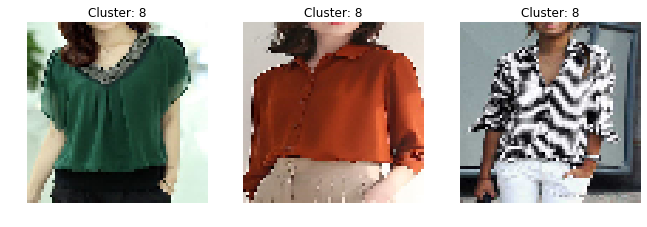

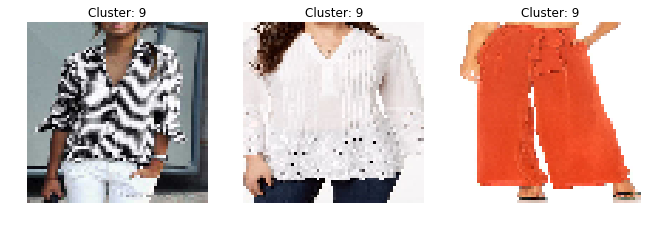

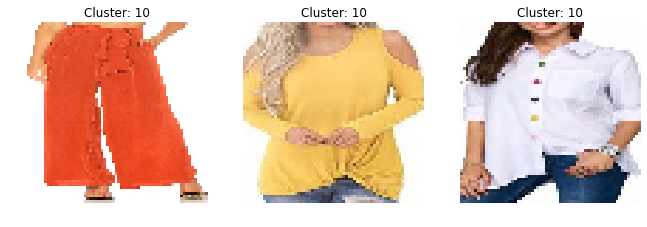

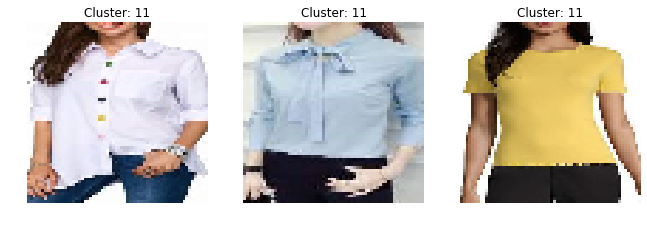

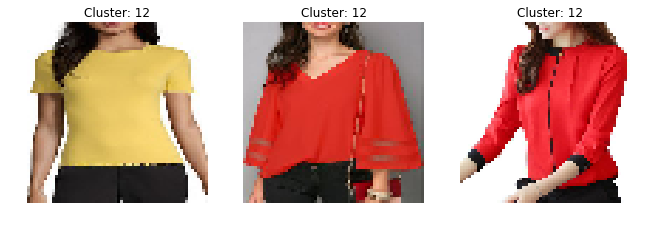

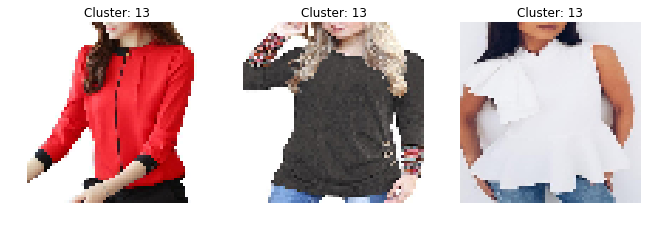

In [81]:
#This is just a test
# Still working output
distances = distanceCalc(centerPoints)


picNums = os.listdir(foldername)

for i in range(0,7):
    print("Level:"+str(i))
    store =findGroup(i*50,distances)
    print(store)
    
    indices = np.where(store == -1)
    count = 0
    print(indices)
    for i in range(1,len(indices[0])):
        sVal = store[indices[0][i-1]-1]
        eVal = store[indices[0][i]
        count = count+1
        
        print(sVal)
        print(eVal)
        print("end")
        
        
        image = Image.open(foldername+"/"+picNums[sVal])
    
        x = 64
        y = 64
    
        resized_image = image.resize((x,y))
        resized_image = np.array(resized_image)
        imagevec = [resized_image]
        
        titlevec = ["Cluster: "+ str(count)]
        
        for j in range(sVal+1,eVal+1):
            image = Image.open(foldername+"/"+picNums[j])
            resized_image = image.resize((x,y))
            resized_image = np.array(resized_image)
            imagevec.append(resized_image)
            titlevec.append("Cluster: "+str(count))
            
        print(len(titlevec))    
        plot_images(imagevec,titlevec)
        
        